<a href="https://colab.research.google.com/github/Kwang-wan/Project_AI/blob/Do-Hyun/Classifiy_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# **데이터 로드**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')


Mounted at /content/gdrive


TypeError: ignored

In [ ]:
save_path = '/content/gdrive/My Drive/Colab Notebooks/'
df = pd.read_csv(save_path + "Trash_Comment.csv" )
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23721 entries, 0 to 23720
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    23721 non-null  object
 1   label   23721 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


,text,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,1
2,짱깨 꺼라ㅡ패쓰,1
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,0


# **전처리**

> # Train/Test Split

In [ ]:
import re

# 해석할 수 없다.....??
def clean_str(string):

    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    
    return string.lower()


In [ ]:

Sentences = [ clean_str(sentence).split(' ') for sentence in df.text.values]
len(Sentences) , Sentences[0][:5]

(23721, ['이종석', '한효주', '나오는', '드라마', '이후로'])

In [ ]:
X = np.array(Sentences)
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(23721,)

> # 글자제한

In [ ]:
sentences_new = []

for sentence in X:
  sentences_new.append( [ word[:10] for word in sentence[:30]] )
X = sentences_new

for i in range(5): print(X[i])

['이종석', '한효주', '나오는', '드라마', '이후로', '드라마', '안봤다', '2년전인가', '\\?', '\\?', '좀', '신선했었지', '근데', '이런', '개막장', '드라마는', '도대체', '누가', '보느냐면', '변태들이', '보는', '것이다', '정상적인', '사람들은', '채널을', '돌리게', '된다', '']
['씨바알', '노무노무', '술프노', '오늘', '저녁은', '꽂등심이다', '']
['짱깨', '꺼라', '패쓰']
['그들의', '사생활', '고인이된', '설리를', '위해서라도', '모두', '조용하길', '지금', '누굴', '탓한다고', '무슨소용이있다고']
['아무리', '법이', '뭣같아도', '무슨', '자격으로', '개인의', '신상정보를', '불특정', '다수에게', '공개하는지', '도저히', '이해가', '안되네요', '법을', '바꾸기', '위해', '노력하세요', '저런', '능력으로', '불법적인', '일을', '공공의', '이익으로', '포장하지', '마시구요']


> # 토크나이즈 / 패딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

input = X

def Tokenize_Padding(sentences , num_words = 20000):

  tokenizer = Tokenizer(num_words = 20000)
  tokenizer.fit_on_texts(sentences)
  X = tokenizer.texts_to_sequences(sentences)
  X = pad_sequences(train_x , padding = 'post')

  return tokenizer , X


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer , X  = Tokenize_Padding(X , 20000)

X.shape


(23721, 30)

In [ ]:
Y = df.label.values.reshape(-1,1).astype(float)
Y.shape

(23721, 1)

In [ ]:
[X,Y]

[array([[ 1709,  1023,   251, ...,     1,     0,     0],
        [10814,  5348, 10815, ...,     0,     0,     0],
        [ 1185,     0,     0, ...,     0,     0,     0],
        ...,
        [ 5895,   101, 14450, ...,     0,     0,     0],
        [18826,  1128, 18827, ...,     0,     0,     0],
        [ 3970,    84,     0, ...,     0,     0,     0]], dtype=int32),
 array([1., 1., 1., ..., 0., 0., 0.])]

> ## Train / Test Split

In [ ]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]; Y = Y[indices]

In [ ]:
[X,Y]

[array([[   78, 17743,     1, ...,     0,     0,     0],
        [  222,     1,     0, ...,     0,     0,     0],
        [ 4928,   563,   185, ...,     0,     0,     0],
        ...,
        [ 7866,  8306,  5040, ...,     0,     0,     0],
        [   40,  9983,     2, ...,     0,     0,     0],
        [12917,     4, 12918, ...,     0,     0,     0]], dtype=int32),
 array([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])]

In [ ]:
training_samples = int(len(X)*0.5)
validation_samples = int(len(X)*0.25)
test_samples = len(X) - training_samples - validation_sample

x_train = X[:training_samples]; 
y_train = Y[:training_samples]

x_valid = X[training_samples : training_samples + validation_samples]
y_valid = Y[training_samples : training_samples + validation_samples]

x_test = X[training_samples + validation_samples : ]
y_test = Y[training_samples + validation_samples : ]

print("트레이닝 샘플 : {} , 벨리데이션 샘플 : {} , 테스트 샘플 : {}".format(training_samples , validation_sample , test_samples))
x_train.shape , x_valid.shape , x_test.shape

트레이닝 샘플 : 11860 , 벨리데이션 샘플 : 5930 , 테스트 샘플 : 5931


((11860, 30), (5930, 30), (5931, 30))

# Model Define

In [ ]:
from keras import models , layers

def build_model():
  model = models.Sequential()

  # 2만개 단어사전을 통해 원핫 인코딩한 25개의 단어를 집어넣어서 각각 300개 특징벡터로 추출
  model.add(layers.Embedding(20000 , 300 , input_length = 30))
  model.add(layers.LSTM(32))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' 
                , metrics = ['accuracy'])

  model.summary()
  return model


In [ ]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,042,657
Trainable params: 6,042,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time

hist = model.fit(x_train , y_train , epochs = 10 
                 , batch_size = 128 , validation_data = (x_valid , y_valid) )

Epoch 1/10
93/93 [==============================] - 39s 67ms/step - loss: 0.6939 - accuracy: 0.5081 - val_loss: 0.6903 - val_accuracy: 0.4850
Epoch 2/10
93/93 [==============================] - 6s 62ms/step - loss: 0.6260 - accuracy: 0.6524 - val_loss: 0.5556 - val_accuracy: 0.7150
Epoch 3/10
93/93 [==============================] - 6s 62ms/step - loss: 0.3479 - accuracy: 0.8607 - val_loss: 0.6102 - val_accuracy: 0.7214
Epoch 4/10
93/93 [==============================] - 6s 62ms/step - loss: 0.2376 - accuracy: 0.8996 - val_loss: 0.6767 - val_accuracy: 0.7216
Epoch 5/10
93/93 [==============================] - 6s 60ms/step - loss: 0.1819 - accuracy: 0.9246 - val_loss: 0.8536 - val_accuracy: 0.7165
Epoch 6/10
93/93 [==============================] - 6s 62ms/step - loss: 0.1538 - accuracy: 0.9310 - val_loss: 0.8699 - val_accuracy: 0.7132
Epoch 7/10
93/93 [==============================] - 6s 62ms/step - loss: 0.1366 - accuracy: 0.9298 - val_loss: 1.0290 - val_accuracy: 0.7206
Epoch 8/10
9

# **학습 결과 / 평가**

In [ ]:
# Visualization

def visualize_train(hist):

  # Loss Visualization

  import matplotlib.pyplot as plt

  epochs = range(1, len(hist.history['loss']) + 1)

  plt.figure(figsize = (9,6))
  plt.plot(epochs , hist.history['loss'])
  plt.plot(epochs , hist.history['val_loss'])

  plt.title('Training & Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Training Loss' , 'Validation Loss'])
  plt.grid()
  plt.show()

  # Accuracy Visualization
  import matplotlib.pyplot as plt
  epochs = range(1, len(hist.history['loss']) + 1)
  plt.figure(figsize = (9, 6))
  plt.plot(epochs, hist.history['accuracy'])
  plt.plot(epochs, hist.history['val_accuracy'])
  plt.title('Training & Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Training Accuracy', 'Validation Accuracy'])
  plt.grid()
  plt.show()


def evaluate(x_test , y_test):
  loss , accuracy = model.evaluate(x_test , y_test)
  print('Loss = {:5f}'.format(loss))
  print('Accuracy = {:.5f}'.format(accuracy))
  return loss , accuracy


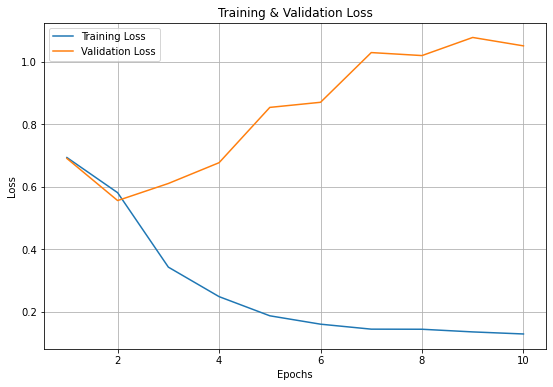

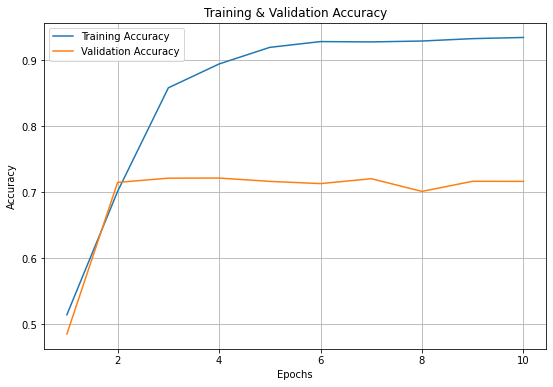

186/186 [==============================] - 1s 3ms/step - loss: 0.9818 - accuracy: 0.7338
Loss = 0.981798
Accuracy = 0.73377


In [ ]:
visualize_train(hist)
loss , accuracy = evaluate(x_test , y_test)

# **결과 직접 보기**

> ## 샘플 추출

In [ ]:
x_test[100:120] , y_test[100:120]

(array([[ 1495,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [   67,   160,     1,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [   18,   630,  9589,  1617, 16194,  1616,   192,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 4349, 12205,  3482,    35,   235, 12206, 12207, 12208,     1,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [142

In [ ]:
text = tokenizer.sequences_to_texts(x_test[100:120])

In [ ]:
pred = model.predict(x_test[100:120])



array([[0.99549156],
       [0.00241332],
       [0.9963356 ],
       [0.98368937],
       [0.00196373],
       [0.00237578],
       [0.00181992],
       [0.48668766],
       [0.5092609 ],
       [0.02314005],
       [0.9961392 ],
       [0.9958865 ],
       [0.48035383],
       [0.22811207],
       [0.99619675],
       [0.00228538],
       [0.99639183],
       [0.9963187 ],
       [0.48035383],
       [0.9961892 ]], dtype=float32)

In [ ]:
len( y_test[100:120 , 0]) , len(pred[:,0].tolist())

(20, 20)

In [ ]:
pred_df = pd.DataFrame( {"text" : text , "label" : y_test[100:120 , 0].tolist() , "pred" : pred[:,0].tolist()})
pred_df

,text,label,pred
0,게이,1.0,0.995492
1,꼭 힘내세요,0.0,0.002413
2,정말 더러운 인간들의 조국 윤미향 추미애 문재인,1.0,0.996336
3,소름 짧은예고를 글로 보고 다음 회 다본듯 얼른다음주,0.0,0.983689
4,어벤져스3이 마지막인거네요 슬프고슬프도다 고인의 명복을 빕니다,0.0,0.001964
5,별걸 다 기사로 쓴다,0.0,0.002376
6,그 가격에 팔면 뭐 잘한 장사도 아니라고 본다,0.0,0.001820
7,정말 다 짱,0.0,0.486688
8,꽃할매보단 역시 꽃할배지 !,0.0,0.509261
9,의지가 없다 진실을 있다 무엇이 않나 \?,1.0,0.023140


In [ ]:

## 1. 악플 제한 x , 댓글들 분석 포커싱


악플 데이터를 쭉 봤는데

1.누가 봐도 악플 - 욕설/혐오발언/성적표현

  애매한 것들도 좀 많더라고요
    게시글 - 부정적인 의견 - 악플
        - 격한 표한 > 악플 판정 맞는데
        - 애매한것들 

악플 분류 + 감성평가

2.댓글 - 감성평가 - 긍정/부정/중립
  - 네이버/카카오 제공해주는 서비스 , 키워드 - 긍정/부정 분석해주는거 그런거처럼
  - 댓글들 반응 > 게시글 에 대한 전체적인 반응 판정

꼭 감성평가가 아니더라도 악플만 볼려고하면 프로젝트 범위가 조금 제한적인거같에요 , 
악플분류에만 제한적으로 보지 않고 댓글을 다향하게 분석해보면 어떨가싶거든요
댓글을 분석할 수 있는 다른 좋은 방법이 있으면 악플 분류하는거에다 같이 하면 좋지 않을까



## 2. 이걸 왜 해야 하는지에 대한 프로젝트 기준이 x 안정

> 사이트 관리/운영 하는 입장

  댓글 > 악플/감성 평가를 한거를 토대로

  악플분류 > 사이트 관리자들이 클린하게 관리하는데 쓰일수 있지 않을까 ,  악질악플러들 잡아내는데 사용 , 댓글을 다는 유저 경고 기능 
  감성분석 > 게시글에 대한 반응을 토대로 분석에 사용할 수 있지 않을까
      - 어떤 게시글 평가가 좋더라 , 안좋더라 왜그럴까 기준 분석
      - 게시글들이 모인 게시판의 전체적인 반응을 분석할수도 있고
          뉴스기준으로 보면 어떤 게시판이 제일 별로더라 하면 그 이유에 대해서 생각
            - 토픽자체가 민감
            - 그 게시판 담당 기자들이 글을 못쓸수도있자나요
      - 반대로 어떤 토픽을 뽑아서 그 토픽과 관련된 게시글들을 크롤링해서 댓글을 보고 토픽에 대한 반응을 평가할수있지 않을까



댓글봇을 만들어본다던가 


저도 정리가 안되긴하는데

악플에만 한정되기보다는 좀 더 댓글들 분석에 포커싱?



---------


# 3. 해야할것


# 당장 정해야할것
  
- 1. 악플 판정 기준 (라벨링)
    라벨링을 직접 해야되는데
    기준자체를 어느정도는 객관화해서 명시해야할 거같음
      

- 2. 데이터를 구할 플랫폼 (여러군데를 해도 좋은데 일단)
    집중적으로 분석할 사이트


# 앞으로 해야할것

- 스크래핑

- 전처리

- 모델 공부/최적화



